In [3]:
PROJECT_ROOT = "../../"
import sys
# The following line adds the parent directory to the python path.
sys.path.insert(0, PROJECT_ROOT) 

In [14]:
from importlib import reload

import src.experiment.sample_utils as su
import src.experiment.experiment_utils as exp
import src.dataset_handling.pamap.write_pamap as wp
import src.experiment.dataset_experiments.pamap_experiments as p_exp
import src.experiment.experiment_cpu as exp_cpu
import src.experiment.dataset_experiments.cpu_vs_gpu_mnist8m as cpu_vs_gpu

reload(su)
reload(exp)
reload(wp)
reload(p_exp)
reload(exp_cpu)
reload(cpu_vs_gpu)

<module 'src.experiment.dataset_experiments.cpu_vs_gpu_mnist8m' from '/home/hphi344/Documents/GS-DBSCAN-Analysis/analysis_notebooks/k_m_exp/../../src/experiment/dataset_experiments/cpu_vs_gpu_mnist8m.py'>

In [7]:
k_m_values = [
    (40, 50), (20, 100), (10, 50), (10, 200), (5, 50), (5, 400), 
    (2, 1250), (2, 2000), (2, 1600), (2, 750), (2, 500), (2, 1000), 
    (1, 3500), (1, 1500), (1, 2000)
 ]


eps = 0.04

dataset_file = r"/home/hphi344/Documents/GS-DBSCAN-Analysis/data/pamap/handled/samples/f16/pamap_sample_n100000_f16.bin"
labels_file = r"/home/hphi344/Documents/GS-DBSCAN-Analysis/data/pamap/handled/samples/f16/pamap_sample_n100000_f16_labels.bin"

params = exp.RunParams(datasetFilename=dataset_file, labels_filename=labels_file, n=100_000, d=51, D=1024, minPts=50, eps=eps, alpha=1.2,
                        distancesBatchSize=100, distanceMetric="COSINE",
                        clusterBlockSize=256, clusterOnCpu=True, needToNormalize=True, print_cmd=True,
                        verbose=False, useBatchDbscan=True, timeIt=True, useBatchABMatrices=True,
                        useBatchNorm=True,
                        datasetDType="f16", ABatchSize=10_000, BBatchSize=28, miniBatchSize=10_000, normBatchSize=10_000, ignoreAdjListSymmetry=False)

In [ ]:
results_df = exp.run_k_m_experiments(k_m_vals=k_m_values, params=params, parquet_name="pamap_k_m_experiments.parquet")

tex = exp.get_k_m_experiments_table(k_m_values, results_df)

In [8]:
results_dir = r"/home/hphi344/Documents/GS-DBSCAN-Analysis/results/pamap/k_m"

k_m_results_df = exp.process_k_m_results(results_dir, labels_path=labels_file, clean=True)

In [11]:
k_m_results_df

,args,numClusters,times,nmi,k,m
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,153,"{'adjList': 13802, 'constructABMatrices': 3736...",0.308782,40,50
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,86,"{'adjList': 21775, 'constructABMatrices': 3159...",0.269097,20,100
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,41,"{'adjList': 24273, 'constructABMatrices': 3103...",0.215307,10,200
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,122,"{'adjList': 3733, 'constructABMatrices': 31326...",0.336594,10,50
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,98,"{'adjList': 2405, 'constructABMatrices': 31236...",0.269777,5,50
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,51,"{'adjList': 24859, 'constructABMatrices': 3138...",0.217849,5,400
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,28,"{'adjList': 26214, 'constructABMatrices': 3070...",0.236230,2,1000
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,37,"{'adjList': 20768, 'constructABMatrices': 2984...",0.219215,2,750
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,35,"{'adjList': 14185, 'constructABMatrices': 3112...",0.202037,2,500
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,23,"{'adjList': 29847, 'constructABMatrices': 3132...",0.232702,2,1250


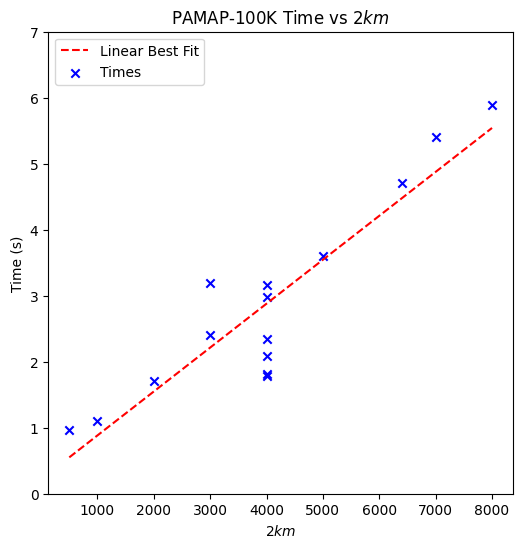

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# No need for subplots, just create a single figure and axis
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111)

k_vals = k_m_results_df['k']
m_vals = k_m_results_df['m']

k_m_product = 2 * k_vals * m_vals

overall_times = np.array([k_m_results_df['times'].iloc[i]["overall"] for i in range(len(k_m_results_df))], dtype=np.float64)

overall_times = overall_times / 1e6

slope, intercept = np.polyfit(k_m_product, overall_times, 1)

fit_x_vals = np.array([k_m_product.min(), k_m_product.max()])

ax1.plot(fit_x_vals, slope * fit_x_vals + intercept, c='r', label='Linear Best Fit', linestyle='--')

ax1.scatter(k_m_product, overall_times, c='b', label='Times', marker='x')

ax1.set_title(r"PAMAP-100K Time vs $2km$")
ax1.set_xlabel(r"$2km$")
ax1.set_ylabel("Time (s)")
ax1.set_ylim(0, 7)
plt.legend(loc='upper left')

plt.savefig(f"../plots/time_vs_2km_pamap.png", dpi=300)

# plt.legend()

In [16]:
print(exp.get_k_m_experiments_table(k_m_results_df))

\begin{tabular}{ccccc}
\toprule
k & m & 2km & Time (s) & NMI \\
\midrule
5 & 50 & 500 & 0.97 & 0.27 \\
10 & 50 & 1000 & 1.10 & 0.34 \\
2 & 500 & 2000 & 1.70 & 0.20 \\
2 & 750 & 3000 & 2.41 & 0.22 \\
1 & 1500 & 3000 & 3.19 & 0.23 \\
40 & 50 & 4000 & 1.79 & 0.31 \\
20 & 100 & 4000 & 1.81 & 0.27 \\
10 & 200 & 4000 & 2.08 & 0.22 \\
5 & 400 & 4000 & 2.35 & 0.22 \\
2 & 1000 & 4000 & 2.98 & 0.24 \\
1 & 2000 & 4000 & 3.17 & 0.24 \\
2 & 1250 & 5000 & 3.60 & 0.23 \\
2 & 1600 & 6400 & 4.71 & 0.04 \\
1 & 3500 & 7000 & 5.40 & 0.03 \\
2 & 2000 & 8000 & 5.89 & 0.03 \\
\bottomrule
\end{tabular}

